In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data_path = '../data/Telecom_customer churn.csv'
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(100000, 100)


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


### データセット内の解約・非解約の割合

49562 0.49562
50438 0.50438


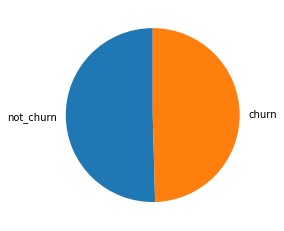

In [3]:
churn_num = len(df[df['churn']==1])
nonchurn_num = len(df[df['churn']==0])
num = len(df)
s = [nonchurn_num, churn_num]
labels = ['not_churn', 'churn']
plt.pie(s, startangle=90, labels=labels)
print(churn_num, churn_num/num)
print(nonchurn_num, nonchurn_num/num)

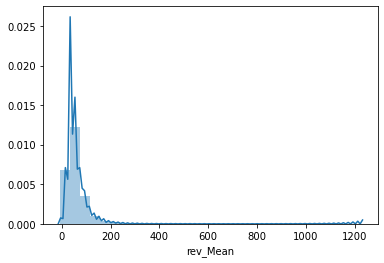

In [4]:
sns.distplot(df[df['rev_Mean']<1500]['rev_Mean'], bins=30)

### 解約・非解約別の機器の使用日数

/home/user/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/user/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


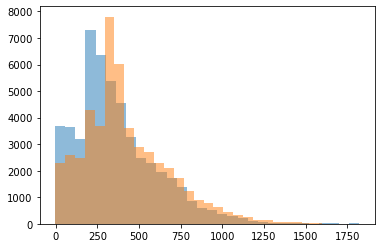

Text(0.5, 0, 'year')

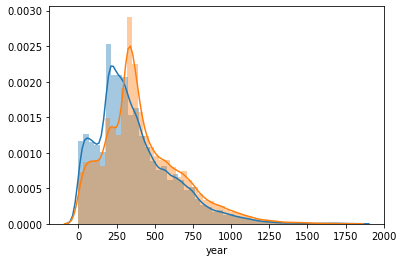

In [5]:
plt.hist(df[df['churn']==0]['eqpdays'], alpha=0.5, bins=30)
plt.hist(df[df['churn']==1]['eqpdays'], alpha=0.5, bins=30)
plt.show()
sns.distplot(df[df['churn']==0]['eqpdays'])
sns.distplot(df[df['churn']==1]['eqpdays'])
plt.xlabel('year')

### 解約・非解約別の契約月数

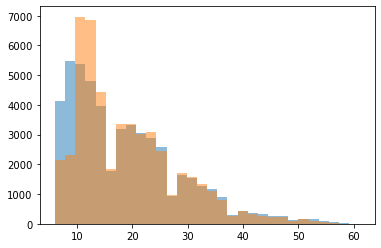

Text(0.5, 0, 'year')

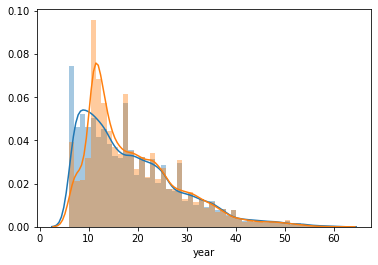

In [6]:
plt.hist(df[df['churn']==0]['months'], alpha=0.5, bins=30)
plt.hist(df[df['churn']==1]['months'], alpha=0.5, bins=30)
plt.show()
sns.distplot(df[df['churn']==0]['months'])
sns.distplot(df[df['churn']==1]['months'])
plt.xlabel('year')

Text(0, 0.5, 'ratio of churn')

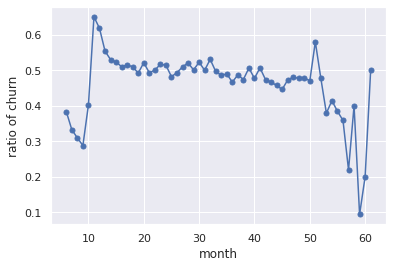

In [7]:
sns.set()
churn_rate = []
pre_r = 0
for m in range(df['months'].min(), df['months'].max()+1):
  d_tmp = df[df['months']==m]
  r = len(d_tmp[d_tmp['churn']==1])/len(d_tmp) # /len(d_tmp)
  churn_rate.append([m, r])
churn_rate = np.array(churn_rate).T
plt.plot(churn_rate[0], churn_rate[1], marker='o', markersize=5)
plt.xlabel('month')
plt.ylabel('ratio of churn')